<a href="https://colab.research.google.com/github/shaifali1102/Supervised-Learning/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Decision Trees

- flowchart like tree structure
- internal node --> feature
- branches --> rules
- leaf --> result
- classification + regression

### Gini Impurity

![gini[1].png](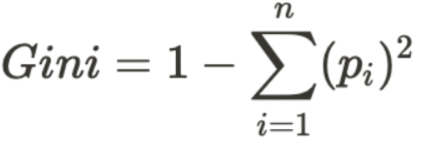)

### Entropy
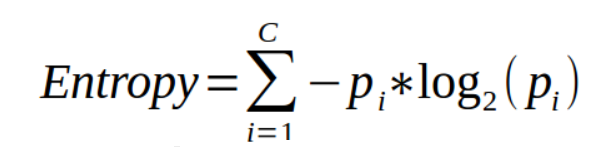

### Information Gain
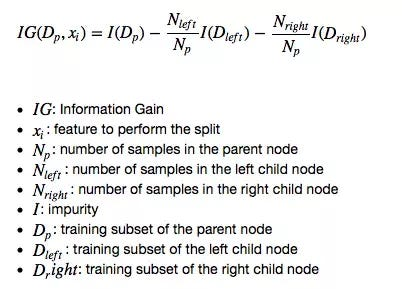

# Decision Tree from Scratch

In [ ]:
#Rough
feature= np.array([0.58, 0.9,  0.45, 0.18, 0.5,  0.12, 0.31, 0.09, 0.24, 0.83])

label= [1, 0 ,0, 0 ,0, 0 ,1, 0 ,1, 1]

p1 = label.count(1)/len(label)
p2 = label.count(0)/len(label)
entropy = (p1)*np.log(p1) + (p2)*np.log(p2)
entropy = -entropy.round(2)

for threshold in np.unique(feature):
  #print(threshold)
  ind = feature.tolist().index(threshold)

  print(ind, label[ind], label[:ind], label[ind+1:])

7 0 [1, 0, 0, 0, 0, 0, 1] [1, 1]
5 0 [1, 0, 0, 0, 0] [1, 0, 1, 1]
3 0 [1, 0, 0] [0, 0, 1, 0, 1, 1]
8 1 [1, 0, 0, 0, 0, 0, 1, 0] [1]
6 1 [1, 0, 0, 0, 0, 0] [0, 1, 1]
2 0 [1, 0] [0, 0, 0, 1, 0, 1, 1]
4 0 [1, 0, 0, 0] [0, 1, 0, 1, 1]
0 1 [] [0, 0, 0, 0, 0, 1, 0, 1, 1]
9 1 [1, 0, 0, 0, 0, 0, 1, 0, 1] []
1 0 [1] [0, 0, 0, 0, 1, 0, 1, 1]


In [ ]:
# Calculates the entropy given list of target(binary) variables
def entropy(s):

    # probabilities of label 1 and 0
    p1 = s.tolist().count(1)/len(s)
    p0 = s.tolist().count(0)/len(s)
    if p1 == 0 or p0 == 0:
        return 0

    # Calculate entropy
    entropy = -((p1)*np.log2(p1) + (p0)*np.log2(p0))

    return entropy

# Compute information gain given left_child target variables (list), right_child target variables(list) and their parent targets(list)
def information_gain(parent, left_child, right_child):

    # left child weighted average * entropy of left child
    left = (len(left_child)/len(parent))*entropy(left_child)
    # right child weighted average * entropy of right child
    right = (len(right_child)/len(parent))*entropy(right_child)

    # information gain = entropy of parent - entropy of children
    info_gain= entropy(parent) - (left + right)

    return info_gain

# Calculate best split
def best_split(features,labels):

    best_threshold= 0
    best_info_gain = -1

    # For every unique value of that feature
    for threshold in np.unique(features):


        y_left =  labels[features<=threshold] #list of labels in left child
        y_right = labels[features>threshold]  #list of labels in right child

        if len(y_left) > 0 and len(y_right) > 0:

            # Calculate the information gain and save the split parameters if the current split if better then the previous best
            gain = information_gain(labels, y_left, y_right)

            #print(threshold, gain)

            # Replace best threshold and gain
            if gain > best_info_gain:
                best_threshold = threshold
                best_info_gain = gain


    return best_threshold

In [ ]:
features= np.array([0.58, 0.9,  0.45, 0.18, 0.5,  0.12, 0.31, 0.09, 0.24, 0.83])

labels= np.array([1, 0 ,0, 0 ,0, 0 ,1, 0 ,1, 1])

best_split(features,labels)

0.18